# Tools - NumPy
*NumPy is the fundamental library for scientific computing with Python. NumPy is centered around a powerful N-dimensional array object, and it also contains useful linear algebra, Fourier transform, and random number functions.*

## Creating arrays
First let's import `numpy`:

In [1]:
import numpy as np

The `zeros` function creates an array containing any number of zeros:

In [2]:
print np.zeros(5)

[ 0.  0.  0.  0.  0.]


It's just as easy to create a 2D array (ie. a matrix) by providing a tuple with the desired number of rows and columns. For example, here's a 3x4 matrix:

In [3]:
print np.zeros((3,4))

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


Some vocabulary:

* In NumPy, each dimension is called an **axis**.
* The number of axes is called the **rank**.
    * For example, the above 3x4 matrix is an array of rank 2 (it is 2-dimensional).
    * The first axis has length 3, the second has length 4.
* An array's list of axis lengths is called the **shape** of the array.
    * For example, the above matrix's shape is `(3, 4)`.
    * The rank is equal to the shape's length.
* The **size** of an array is the total number of elements, which is the product of all axis lengths (eg. 3*4=12)

In [4]:
a = np.zeros((3,4))
print a
print "Shape:", a.shape
print "Rank:", a.ndim
print "Size:", a.size

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
Shape: (3, 4)
Rank: 2
Size: 12


You can also create an N-dimensional array of arbitrary rank. For example, here's a 3D array (rank=3), with shape `(2,3,4)`:

In [5]:
print np.zeros((2,3,4))

[[[ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]]

 [[ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]]]


Let's look at the type of these arrays:

In [6]:
print type(np.zeros((3,4)))

<type 'numpy.ndarray'>


Many other NumPy functions create `ndarrays`.

Here's a 3x4 matrix full of ones:

In [7]:
print np.ones((3,4))

[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]


An uninitialized 2x3 array (its content is not predictable, as it is whatever is in memory at that point):

In [8]:
print np.empty((2,3))

[[ -1.28822975e-231  -1.28822975e-231   2.17321951e-314]
 [  2.17322671e-314  -1.28822975e-231  -1.28822975e-231]]


Of course you can initialize an `ndarray` using a regular python array (or any iterable). Just call the `array` function:

In [9]:
a = np.array([[1,2,3,4], [10, 20, 30, 40]])
print type(a)
print a

<type 'numpy.ndarray'>
[[ 1  2  3  4]
 [10 20 30 40]]


You can create an `ndarray` using NumPy's `range` function, which is similar to python's built-in `range` function:

In [10]:
print np.arange(1, 5)

[1 2 3 4]


It also works with floats:

In [11]:
print np.arange(1.0, 5.0)

[ 1.  2.  3.  4.]


Of course you can provide a step parameter:

In [12]:
print np.arange(1, 5, 0.5)

[ 1.   1.5  2.   2.5  3.   3.5  4.   4.5]


However, when dealing with floats, the exact number of elements in the array is not always predictible. For example, consider this:

In [13]:
print np.arange(0, 5/3.0, 1/3.0) # depending on floating point errors, the max value is 4/3.0 or 5/3.0.
print np.arange(0, 5/3.0, 0.333333333)
print np.arange(0, 5/3.0, 0.333333334)


[ 0.          0.33333333  0.66666667  1.          1.33333333  1.66666667]
[ 0.          0.33333333  0.66666667  1.          1.33333333  1.66666667]
[ 0.          0.33333333  0.66666667  1.          1.33333334]


For this reason, it is generally preferable to use the `linspace` function instead of `arange` when working with floats. The `linspace` function returns an array containing a specific number of points evenly distributed between two values (note that the maximum value is *included*, contrary to `arange`):

In [14]:
print np.linspace(0, 5/3.0, 6)

[ 0.          0.33333333  0.66666667  1.          1.33333333  1.66666667]


A number of functions are available in NumPy's `random` module to create `ndarray`s initialized with random values.
For example, here is a 3x4 matrix initialized with random floats between 0 and 1 (uniform distribution):

In [15]:
print np.random.rand(3,4)

[[ 0.31505455  0.75655077  0.15133163  0.61991085]
 [ 0.42809672  0.56288807  0.74871884  0.55155697]
 [ 0.5127511   0.65383425  0.13132709  0.79646256]]


Here's a 3x4 matrix containing random floats sampled from a univariate [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) (Gaussian distribution) of mean 0 and variance 1:

In [16]:
print np.random.randn(3,4)

[[ 0.10283232  1.73246206 -0.06356761 -0.07068949]
 [ 1.61004733  0.12150407 -1.26750323  0.97991332]
 [ 0.32727099 -0.86810473 -1.12277424  1.39791034]]


To give you a feel of what these distributions look like, let's use matplotlib (see the [matplotlib tutorial](tools_matplotlib.ipynb) for more details):

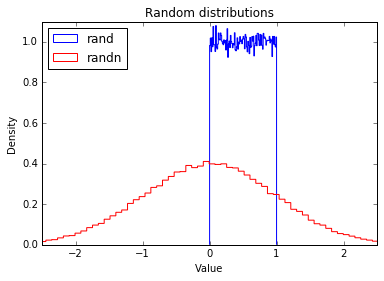

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(np.random.rand(100000), normed=True, bins=100, histtype="step", color="blue", label="rand")
plt.hist(np.random.randn(100000), normed=True, bins=100, histtype="step", color="red", label="randn")
plt.axis([-2.5, 2.5, 0, 1.1])
plt.legend(loc = "upper left")
plt.title("Random distributions")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

You can also initialize an `ndarray` using a function:

In [18]:
def my_function(z, y, x):
    return x * y + z

print np.fromfunction(my_function, (3, 2, 10))

[[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
  [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.]]

 [[  1.   1.   1.   1.   1.   1.   1.   1.   1.   1.]
  [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]]

 [[  2.   2.   2.   2.   2.   2.   2.   2.   2.   2.]
  [  2.   3.   4.   5.   6.   7.   8.   9.  10.  11.]]]


NumPy first creates three `ndarrays` (one per dimension), each of shape `(3, 2, 10)`. Each array has values equal to the coordinate along a specific axis. For example, all elements in the `z` array are equal to the z-coordinate:

    [[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
      [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
    
     [[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
      [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]
    
     [[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
      [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]]]

This means that `my_function` is only called once, so the initialization is very efficient.

## Array data
NumPy's `ndarray`s are very efficient in part because all their elements must have the same type (usually numbers).
You can check what the data type is by looking at the `dtype` attribute:

In [19]:
a = np.arange(1, 5)
print a.dtype, a

b = np.arange(1.0, 5.0)
print b.dtype, b

int64 [1 2 3 4]
float64 [ 1.  2.  3.  4.]


Instead of letting NumPy guess what data type to use, you can set it explicitly when creating an array by setting the `dtype` parameter:

In [20]:
a = np.arange(1, 5, dtype=np.complex64)
print a.dtype, a

complex64 [ 1.+0.j  2.+0.j  3.+0.j  4.+0.j]


Available data types include int8, int16, int32, int64, uint8/16/32/64, float16/32/64 and complex64/128.  Check out [the documentation](http://docs.scipy.org/doc/numpy-1.10.1/user/basics.types.html) for the full list.

The `itemsize` attribute returns the size (in bytes) of each item:

In [21]:
a = np.arange(1, 5, dtype=np.complex64)
print a.itemsize

8


An array's data is actually stored in memory as a flat (one dimensional) byte buffer. It is available *via* the `data` attribute (you will rarely need it, though).

In [22]:
a = np.array([[1,2],[1000, 2000]], dtype=np.int32)
print "Array:"
print a
print "Raw data:"
print [ord(c) for c in a.data]

Array:
[[   1    2]
 [1000 2000]]
Raw data:
[1, 0, 0, 0, 2, 0, 0, 0, 232, 3, 0, 0, 208, 7, 0, 0]


Several `ndarrays` can share the same data buffer, meaning that modifying one will also modify the others. We will see an example in a minute.

## Reshaping an array
Changing the shape of an `ndarray` is as simple as setting its `shape` attribute. However, the array's size must remain the same.

In [23]:
a = np.arange(24)
print a
print "Rank:", a.ndim

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Rank: 1


In [24]:
a.shape = (6, 4)
print a
print "Rank:", a.ndim

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
Rank: 2


In [25]:
a.shape = (2, 3, 4)
print a
print "Rank:", a.ndim

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
Rank: 3


The `reshape` function returns a new `ndarray` object pointing to the *same* data. This means that modifying one array will also modify the other.

In [26]:
a2 = a.reshape(4,6)
print a2
print "Rank:", a2.ndim

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
Rank: 2


Set item at row 1, col 2 to 999 (more about indexing below).

In [27]:
a2[1, 2] = 999
print a2

[[  0   1   2   3   4   5]
 [  6   7 999   9  10  11]
 [ 12  13  14  15  16  17]
 [ 18  19  20  21  22  23]]


The corresponding element in a has been modified.

In [28]:
print a

[[[  0   1   2   3]
  [  4   5   6   7]
  [999   9  10  11]]

 [[ 12  13  14  15]
  [ 16  17  18  19]
  [ 20  21  22  23]]]


Finally, the `ravel` function returns a new one-dimensional `ndarray` that also points to the same data:

In [29]:
a3 = a.ravel()
print a3

[  0   1   2   3   4   5   6   7 999   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23]


## Array indexing
One-dimensional NumPy arrays can be accessed more or less like regular python arrays:

In [30]:
a = np.array([1, 5, 3, 19, 13, 7, 3])
print a[3]

19


In [31]:
print a[2:5]

[ 3 19 13]


In [32]:
print a[2:-1]

[ 3 19 13  7]


In [33]:
print a[:2]

[1 5]


In [34]:
print a[2::2]

[ 3 13  3]


In [35]:
print a[::-1]

[ 3  7 13 19  3  5  1]


Of course, you can modify elements:

In [36]:
a[3]=999
print a

[  1   5   3 999  13   7   3]


You can also modify an `ndarray` slice:

In [37]:
a[2:5] = [997, 998, 999]
print a

[  1   5 997 998 999   7   3]


And if you assign a single value, it is copied across the whole slice (this is called *broadcasting*, more on this below):

In [38]:
a[2:5] = -1
print a

[ 1  5 -1 -1 -1  7  3]


Contrary to regular python arrays, you cannot grow or shrink `ndarray`s this way:

In [39]:
try:
    a[2:5] = [1,2,3,4,5,6]  # too long
except ValueError, e:
    print e

cannot copy sequence with size 6 to array axis with dimension 3


You cannot delete elements either:

In [40]:
try:
    del a[2:5]
except ValueError, e:
    print e

cannot delete array elements


Multi-dimensional arrays can be accessed in a similar way by providing an index or slice for each axis, separated by commas:

In [41]:
b = np.arange(48).reshape(4, 12)
print b

[[ 0  1  2  3  4  5  6  7  8  9 10 11]
 [12 13 14 15 16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31 32 33 34 35]
 [36 37 38 39 40 41 42 43 44 45 46 47]]


In [42]:
print b[1, 2]  # row 1, col 2

14


In [43]:
print b[1, :]  # row 1, all columns

[12 13 14 15 16 17 18 19 20 21 22 23]


In [44]:
print b[:, 1]  # all rows, column 1

[ 1 13 25 37]


In [45]:
print b[(0,2), 2:5]  # rows 0 and 2, columns 2 to 4 (5-1)

[[ 2  3  4]
 [26 27 28]]


You can also provide an `ndarray` of boolean values to specify the indices that you want to access. This will come in handy later:

In [46]:
bools = np.array([True, False, True, False])
print b[bools, :]  # Rows 0 and 2, all columns. Equivalent to b[(1, 3), :]

[[ 0  1  2  3  4  5  6  7  8  9 10 11]
 [24 25 26 27 28 29 30 31 32 33 34 35]]


In [47]:
print b[b % 3 == 1]

[ 1  4  7 10 13 16 19 22 25 28 31 34 37 40 43 46]


Note the subtle difference between these two expressions: 

In [48]:
print b[1, :]
print b[1:2, :]

[12 13 14 15 16 17 18 19 20 21 22 23]
[[12 13 14 15 16 17 18 19 20 21 22 23]]


The first expression returns row 1 as a 1D array of shape `(12,)`, while the second returns that same row as a 2D array of shape `(1, 12)`.

Everything works just as well with higher dimension arrays:

In [49]:
c = b.reshape(4,2,6)
print c

[[[ 0  1  2  3  4  5]
  [ 6  7  8  9 10 11]]

 [[12 13 14 15 16 17]
  [18 19 20 21 22 23]]

 [[24 25 26 27 28 29]
  [30 31 32 33 34 35]]

 [[36 37 38 39 40 41]
  [42 43 44 45 46 47]]]


In [50]:
print c[2, 1, 4]  # matrix 2, row 1, col 4

34


In [51]:
print c[2, :, 3]  # matrix 2, all rows, col 3

[27 33]


If you omit coordinates for some axes, then all elements in these axes are returned:

In [52]:
print c[2, 1]  # Return matrix 2, row 1, all columns.  This is equivalent to c[2, 1, :]

[30 31 32 33 34 35]


You may also write an ellipsis (`...`) to specify that all non-specified axes must be entirely included.

In [53]:
print c[2, ...]  #  matrix 2, all rows, all columns.  This is equivalent to c[2, :, :]

[[24 25 26 27 28 29]
 [30 31 32 33 34 35]]


In [54]:
print c[2, 1, ...]  # matrix 2, row 1, all columns.  This is equivalent to c[2, 1, :]

[30 31 32 33 34 35]


In [55]:
print c[2, ..., 3]  # matrix 2, all rows, column 3.  This is equivalent to c[2, :, 3]

[27 33]


In [56]:
print c[..., 3]  # all matrices, all rows, column 3.  This is equivalent to c[:, :, 3]

[[ 3  9]
 [15 21]
 [27 33]
 [39 45]]


## Broadcasting

As we discussed above, assigning to an `ndarray` slice requires an `ndarray` of the same shape as the slice. In general, when NumPy expects arrays of the same shape but finds that this is not the case, it applies the so-called *broadcasting* rules:

**First rule**: if the arrays do not have the same rank, then a 1 will be prepended to the smaller ranking arrays until their ranks match.



In [57]:
a = np.arange(10).reshape(1, 1, 10)
print a

[[[0 1 2 3 4 5 6 7 8 9]]]


In [58]:
print "Slice:", a[..., 2:4]
print "Shape:", a[..., 2:4].shape

Slice: [[[2 3]]]
Shape: (1, 1, 2)


Now let's try to assign a 1D array of shape `(2,)` to this 3D array of shape `(1,1,2)`. Applying the first rule of broadcasting!

In [59]:
a[..., 2:4] = [55, 66]  # acts as [[[55, 56]]]
print a

[[[ 0  1 55 66  4  5  6  7  8  9]]]


**Second rule**: arrays with a 1 along a particular dimension act as if they had the size of the array with the largest shape along that dimension. The value of the array element is repeated along that dimension.

In [60]:
b = np.arange(10).reshape(2, 5)
print b

[[0 1 2 3 4]
 [5 6 7 8 9]]


In [61]:
print "Slice:"
print b[..., 1:4]
print "Shape:", b[..., 1:4].shape

Slice:
[[1 2 3]
 [6 7 8]]
Shape: (2, 3)


Let's try to assign a 2D array of shape `(2,1)` to this slice of shape `(2, 3)`. NumPy will apply the second rule of broadcasting:

In [62]:
b[..., 1:4] = [[44], [55]]  # acts as [[44, 44, 44], [55, 55, 55]]
print b

[[ 0 44 44 44  4]
 [ 5 55 55 55  9]]


Combining rules 1 & 2, we can do this:

In [63]:
b[..., 1:4] = [66, 77, 88]  # after rule 1: [[66, 77, 88]], and after rule 2: [[66, 77, 88], [66, 77, 88]]
print b

[[ 0 66 77 88  4]
 [ 5 66 77 88  9]]


And also, very simply:

In [64]:
b[..., 1:4] = 99  # after rule 1: [[99]], and after rule 2: [[99, 99, 99], [99, 99, 99]]
print b

[[ 0 99 99 99  4]
 [ 5 99 99 99  9]]


**Third rule**: after rules 1 & 2, the sizes of all arrays must match.

In [65]:
try:
    b[..., 1:4] = [33, 44]
except ValueError, e:
    print e

could not broadcast input array from shape (2) into shape (2,3)


Broadcasting rules are used in many NumPy operations, not just assignment, as we will see below.
For more details about broadcasting, check out [the documentation](https://docs.scipy.org/doc/numpy-dev/user/basics.broadcasting.html).

## Iterating
Iterating over `ndarray`s is very similar to iterating over regular python arrays. Note that iterating over multidimensional arrays is done with respect to the first axis.

In [66]:
c = np.arange(24).reshape(2, 2, 6)  # A 3D array (composed of two 2x6 matrices)
print c

[[[ 0  1  2  3  4  5]
  [ 6  7  8  9 10 11]]

 [[12 13 14 15 16 17]
  [18 19 20 21 22 23]]]


In [67]:
for m in c:
    print "Item:"
    print m

Item:
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]
Item:
[[12 13 14 15 16 17]
 [18 19 20 21 22 23]]


In [68]:
for i in range(len(c)):  # Note that len(c) == c.shape[0]
    print "Item:"
    print c[i]

Item:
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]
Item:
[[12 13 14 15 16 17]
 [18 19 20 21 22 23]]


If you want to iterate on *all* elements in the `ndarray`, simply iterate over the `flat` attribute:

In [69]:
for i in c.flat:
    print "Item:", i

Item: 0
Item: 1
Item: 2
Item: 3
Item: 4
Item: 5
Item: 6
Item: 7
Item: 8
Item: 9
Item: 10
Item: 11
Item: 12
Item: 13
Item: 14
Item: 15
Item: 16
Item: 17
Item: 18
Item: 19
Item: 20
Item: 21
Item: 22
Item: 23


## Arithmetic operations
All the usual arithmetic operators (`+`, `-`, `*`, `/`, `**`, etc.) can be used with `ndarray`s. They apply elementwise:

In [70]:
a = np.array([14, 23, 32, 41])
b = np.array([5,  4,  3,  2])
print "a + b  =", a + b
print "a - b  =", a - b
print "a * b  =", a * b
print "a / b  =", a / b
print "a % b  =", a % b
print "a ** b =", a ** b

a + b  = [19 27 35 43]
a - b  = [ 9 19 29 39]
a * b  = [70 92 96 82]
a / b  = [ 2  5 10 20]
a % b  = [4 3 2 1]
a ** b = [537824 279841  32768   1681]


Note that the multiplication is *not* a matrix multiplication. We will discuss matrix operations below.

The arrays must have the same shape. If they do not, NumPy will apply the broadcasting rules, as discussed above.

In [71]:
print a * 3  # thanks to broadcasting, this is equivalent to: a * [3, 3, 3, 3]

[ 42  69  96 123]


The conditional operators also apply elementwise:

In [72]:
print a < [15, 16, 35, 36]

[ True False  True False]


And using broadcasting:

In [73]:
print a < 25  # equivalent to a < [25, 25, 25, 25]

[ True  True False False]


This is most useful in conjunction with boolean indexing:

In [74]:
print a[a < 25]

[14 23]


Note that all matching elements are returned as a 1D array, no matter the original array's shape:

In [75]:
p = np.fromfunction(lambda row, col: row*col, (3,6))
print p

[[  0.   0.   0.   0.   0.   0.]
 [  0.   1.   2.   3.   4.   5.]
 [  0.   2.   4.   6.   8.  10.]]


In [76]:
print p[p%3 == 1]

[  1.   4.   4.  10.]


It is possible (and quite convenient) to use boolean indexing and assignment jointly:

In [77]:
p[p%3 == 1] = 99
print p

[[  0.   0.   0.   0.   0.   0.]
 [  0.  99.   2.   3.  99.   5.]
 [  0.   2.  99.   6.   8.  99.]]


## To be continued...